# Polynomial regression - overfitting and underfitting

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
# Simulate data
samples = 100
X = np.random.uniform(-3,3, (samples,1))
# Andragradsekvation
f = lambda x: x**2 + .5*x + 3 # Utan noise
# Konstruerar vårt y
y = f(X) + np.random.randn(samples, 1) # adds an epsilon standard normally distributed (noise)


f(X).shape, X.shape

((100, 1), (100, 1))

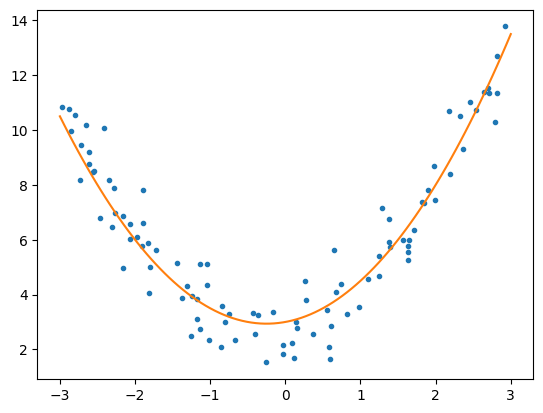

In [16]:
x = np.linspace(-3,3, 100).reshape(100, 1)


plt.plot(X, y, '.')
plt.plot(x, f(x))


<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}, xlabel='x', ylabel='y'>

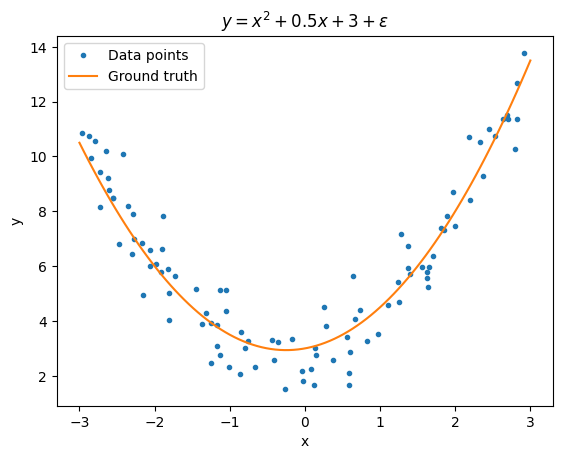

In [49]:
def draw_data():
    fig, ax = plt.figure(), plt.axes()
    ax.plot(X, y, '.', label="Data points")
    x = np.linspace(-3,3, samples).reshape(-1, 1)
    ax.plot(x, f(x), label="Ground truth")
    ax.set(title = r"$y = x^2+0.5x+3+\epsilon$", xlabel="x", ylabel= "y")
    ax.legend()

    return ax
    
draw_data()

In [72]:
# # Undersökte reshape...
# x = np.arange(20).reshape(-1, 10)
# x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

## Polynomial regression

## Feature engineering

- constructed features artificially

In [61]:
from sklearn.preprocessing import PolynomialFeatures # Det är en preprocessing för vi behöver artificiellt konstruera features(till en viss grad)

polynomial_instance = PolynomialFeatures(degree=2, include_bias=False) # Går att välja högre degree G
polynomial_features =  polynomial_instance.fit_transform(X)
# Den gör fit och transform tillsammans, Det är okej att göra när man gör polynomial features
# Den tittar på graden så den kommer inte läcka. (Transformerar hela datan, test och train)

polynomial_features[:5], X[:5], .75**2, 2.7**2

# Detta är matrisen från teorin vi har skapat. 

# X, X^2

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433]]),
 array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816]]),
 0.5625,
 7.290000000000001)

In [64]:
from sklearn.linear_model import LinearRegression
# Todo polynomialregression we use Linearregression

model = LinearRegression()
model.fit(polynomial_features, y) # trains model on dataset
model.coef_
# Vi får ut beta_1 och beta_2


array([[0.43366893, 1.06456263]])

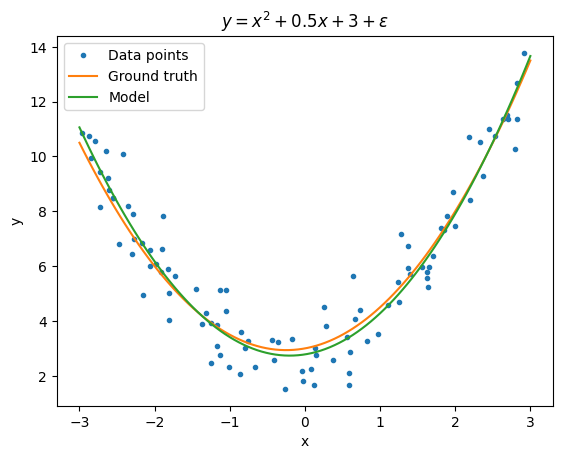

In [79]:
x = np.linspace(-3, 3, samples).reshape(-1,1) # Vi har skapat x-värden från -3 till 3. In this case test data
x_polynomial_features = polynomial_instance.transform(x) # Måste transformera för att göra model.predict


y_pred = model.predict(x_polynomial_features)

ax = draw_data()
ax.plot(x, y_pred, label="Model")
ax.legend()

## Elbow plot